In [3]:
import torch 
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
import sklearn.datasets as datasets

# Linear Regression

In [26]:
# step 0: prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

# --> convert them to tensors
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [27]:
y = y.view(y.shape[0], 1) # reshape y to be a column vector
print(y)

tensor([[-5.5539e+01],
        [-1.0662e+01],
        [ 2.2757e+01],
        [ 1.0110e+02],
        [ 1.4434e+02],
        [ 3.3289e+01],
        [ 3.3015e+01],
        [-2.5887e+01],
        [-9.9639e+01],
        [ 2.3803e+01],
        [-4.5589e+01],
        [-8.3388e+00],
        [-9.5315e+01],
        [ 3.6407e+01],
        [-8.7293e+01],
        [ 6.7669e+01],
        [-1.3687e+01],
        [-5.5441e+01],
        [-6.5340e+01],
        [-5.4450e+01],
        [-2.8835e+01],
        [ 1.7884e+02],
        [ 6.5084e+01],
        [ 2.6668e+01],
        [-1.8546e+01],
        [-4.1499e+01],
        [ 8.5583e-01],
        [ 4.4562e+01],
        [ 1.1598e+02],
        [-6.4620e+01],
        [-2.5931e+01],
        [-6.0882e+01],
        [ 1.8720e+01],
        [ 7.5070e+01],
        [ 1.1720e+02],
        [-2.2698e+01],
        [-5.6363e+01],
        [ 1.8084e+02],
        [-1.9257e+02],
        [ 6.8503e+01],
        [ 1.6552e+02],
        [ 1.0500e+02],
        [-7.0434e+01],
        [-5

In [28]:
# step 1: setting up the model
n_samples, n_features = X.shape # n_samples = 100, n_features = 1

# consider linear model f = wx + b
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size) # nn.Linear applies a linear transformation to the incoming data: y = xA^T + b
criterion = nn.MSELoss() # mean squared error
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # stochastic gradient descent

In [29]:
# step 2: training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # empty gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4476.6821
epoch: 20, loss = 3336.7166
epoch: 30, loss = 2512.3525
epoch: 40, loss = 1915.5541
epoch: 50, loss = 1483.0579
epoch: 60, loss = 1169.3331
epoch: 70, loss = 941.5633
epoch: 80, loss = 776.0641
epoch: 90, loss = 655.7218
epoch: 100, loss = 568.1551
epoch: 110, loss = 504.3975
epoch: 120, loss = 457.9483
epoch: 130, loss = 424.0911
epoch: 140, loss = 399.4006
epoch: 150, loss = 381.3867
epoch: 160, loss = 368.2388
epoch: 170, loss = 358.6389
epoch: 180, loss = 351.6272
epoch: 190, loss = 346.5044
epoch: 200, loss = 342.7605
epoch: 210, loss = 340.0237
epoch: 220, loss = 338.0227
epoch: 230, loss = 336.5593
epoch: 240, loss = 335.4889
epoch: 250, loss = 334.7057
epoch: 260, loss = 334.1328
epoch: 270, loss = 333.7134
epoch: 280, loss = 333.4065
epoch: 290, loss = 333.1819
epoch: 300, loss = 333.0174
epoch: 310, loss = 332.8970
epoch: 320, loss = 332.8088
epoch: 330, loss = 332.7443
epoch: 340, loss = 332.6970
epoch: 350, loss = 332.6624
epoch: 360, loss = 332.

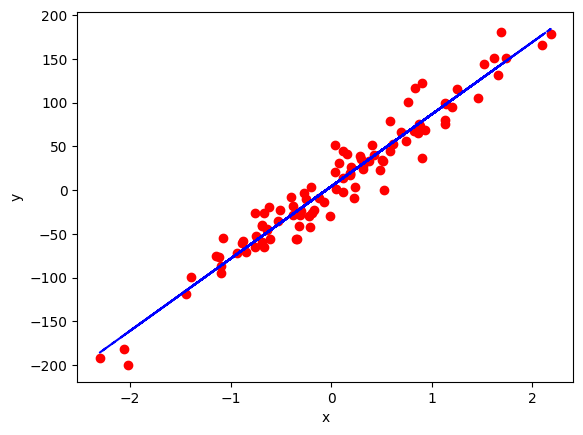

In [30]:
# step 3: plot
y_predicted = model(X).detach().numpy() # detach() creates a tensor that shares storage with self that does not require grad
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, y_predicted, '--b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Logistic Regression

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
# 0) prepare data
bc = datasets.load_breast_cancer()

# 1) prepare data
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [17]:
# defining the model
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

In [18]:
# loss and optimizer
criterion = nn.BCELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [21]:
# training loop
num_epochs = 300
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # empty gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


epoch: 10, loss = 0.1515
epoch: 20, loss = 0.1493
epoch: 30, loss = 0.1471
epoch: 40, loss = 0.1450
epoch: 50, loss = 0.1430
epoch: 60, loss = 0.1411
epoch: 70, loss = 0.1393
epoch: 80, loss = 0.1376
epoch: 90, loss = 0.1359
epoch: 100, loss = 0.1343
epoch: 110, loss = 0.1328
epoch: 120, loss = 0.1313
epoch: 130, loss = 0.1298
epoch: 140, loss = 0.1285
epoch: 150, loss = 0.1271
epoch: 160, loss = 0.1259
epoch: 170, loss = 0.1246
epoch: 180, loss = 0.1234
epoch: 190, loss = 0.1223
epoch: 200, loss = 0.1212
epoch: 210, loss = 0.1201
epoch: 220, loss = 0.1190
epoch: 230, loss = 0.1180
epoch: 240, loss = 0.1170
epoch: 250, loss = 0.1161
epoch: 260, loss = 0.1151
epoch: 270, loss = 0.1142
epoch: 280, loss = 0.1134
epoch: 290, loss = 0.1125
epoch: 300, loss = 0.1117


In [22]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

accuracy = 0.9123
